In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
!pwd

/mnt/c/code/wind/turbulence_spectra/notebooks


In [98]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
path = Path('../data/processed/sonic.parquet')
assert path.exists()

In [4]:
sonic = pd.read_parquet(path)

In [5]:
sonic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306540 entries, 0 to 306539
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   height                  306540 non-null  int64         
 1   nan_count               306540 non-null  int64         
 2   mean                    287187 non-null  float64       
 3   diff_mean_sq            286675 non-null  float64       
 4   diff_mean_cube          287187 non-null  float64       
 5   cum_square_sd_60s       272980 non-null  float64       
 6   cum_square_sd_30s       272980 non-null  float64       
 7   cum_square_sd_10s       272980 non-null  float64       
 8   cum_square_sd_2s        272980 non-null  float64       
 9   cum_cube_sd_60s         272980 non-null  float64       
 10  cum_cube_sd_30s         272980 non-null  float64       
 11  cum_cube_sd_10s         272980 non-null  float64       
 12  cum_cube_sd_2s          272980

In [6]:
heights = sonic['height'].unique()
heights

array([119, 100,  74,  61,  41,  15])

In [7]:
s119 = sonic.query('height == 119').drop(columns='height').set_index('timestamp', drop=True)
s119.head(3)

,nan_count,mean,diff_mean_sq,diff_mean_cube,cum_square_sd_60s,cum_square_sd_30s,cum_square_sd_10s,cum_square_sd_2s,cum_cube_sd_60s,cum_cube_sd_30s,...,vert_mean_cube,vert_cum_square_sd_60s,vert_cum_square_sd_30s,vert_cum_square_sd_10s,vert_cum_square_sd_2s,dir_mean,waked_frac,min,max,3s_gust
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-31 17:00:00,0,7.741269,0.278593,6.444512,0.175206,0.221440,0.249491,0.270052,6.103863,6.372773,...,-0.007359,0.018279,0.034086,0.060655,0.080494,22.387368,0.0,5.897542,9.155119,8.767440
2018-12-31 17:10:00,0,7.233263,0.477996,10.375038,0.373757,0.418074,0.445737,0.466931,10.097132,10.295073,...,-0.025958,0.040330,0.063172,0.104504,0.128307,18.887359,0.0,5.136351,8.879262,8.729885
2018-12-31 17:20:00,0,7.899411,0.279826,6.436817,0.173689,0.219780,0.251649,0.270449,6.068854,6.338365,...,-0.033056,0.016517,0.029382,0.051968,0.068729,19.203382,0.0,5.464796,9.372838,8.775160


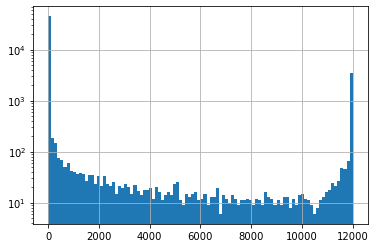

In [8]:
s119['nan_count'].hist(bins=100, log=True)

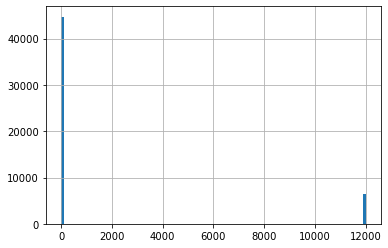

In [9]:
s119['vert_nan_count'].hist(bins=100)

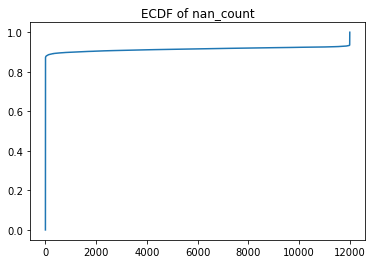

In [10]:
plt.plot(s119['nan_count'].sort_values(), np.arange(len(s119)) / len(s119),)
plt.title("ECDF of nan_count")
plt.show()

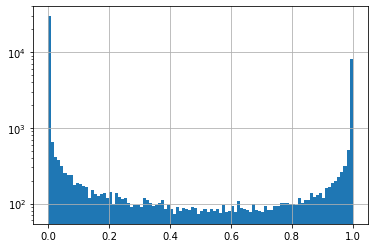

In [11]:
s119['waked_frac'].hist(bins=100, log=True)

In [12]:
s119.columns

Index(['nan_count', 'mean', 'diff_mean_sq', 'diff_mean_cube',
       'cum_square_sd_60s', 'cum_square_sd_30s', 'cum_square_sd_10s',
       'cum_square_sd_2s', 'cum_cube_sd_60s', 'cum_cube_sd_30s',
       'cum_cube_sd_10s', 'cum_cube_sd_2s', 'vert_nan_count', 'vert_mean',
       'vert_mean_square', 'vert_mean_cube', 'vert_cum_square_sd_60s',
       'vert_cum_square_sd_30s', 'vert_cum_square_sd_10s',
       'vert_cum_square_sd_2s', 'dir_mean', 'waked_frac', 'min', 'max',
       '3s_gust'],
      dtype='object')

In [13]:
subset = ['nan_count', 'mean', 'diff_mean_sq', 'diff_mean_cube',
       'cum_square_sd_30s', 'cum_cube_sd_30s', 'vert_nan_count', 'vert_mean',
       'vert_mean_square', 'vert_mean_cube',
       'vert_cum_square_sd_30s', 'dir_mean', 'waked_frac']

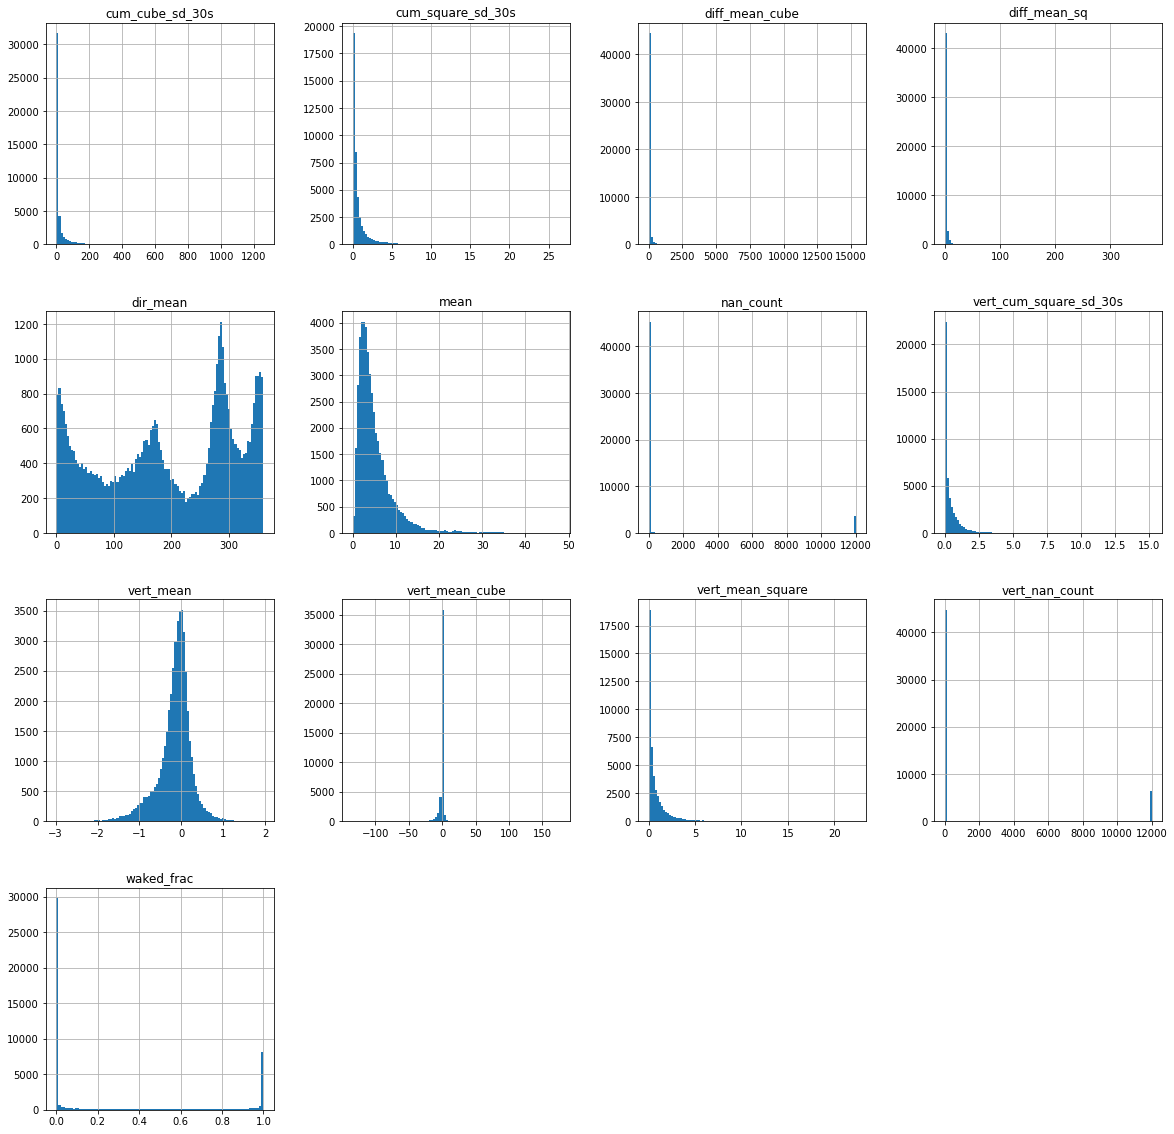

In [14]:
s119[subset].hist(bins=100, figsize=(20,20))
plt.show()

In [15]:
subset = ['cum_square_sd_30s', 'cum_cube_sd_30s', 'vert_mean_square', 'vert_mean_cube', 'vert_cum_square_sd_30s', 'diff_mean_sq']

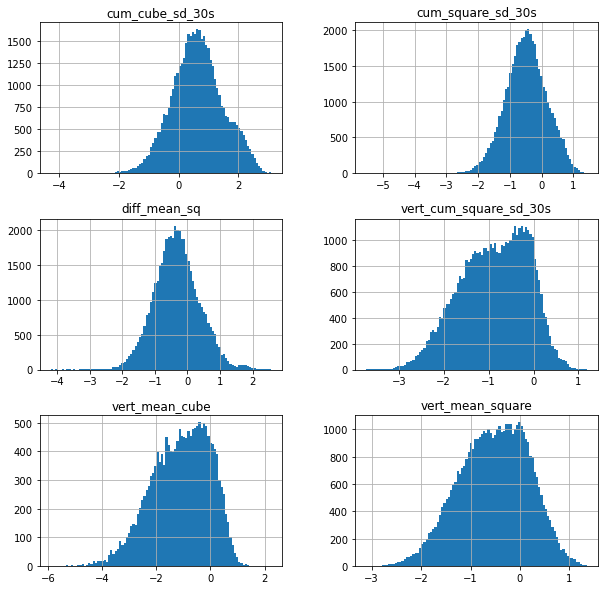

In [65]:
s119[subset].transform(np.log10).hist(bins=100, figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d9041aeb0>]],
      dtype=object)

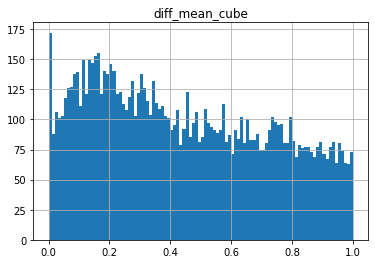

In [17]:
s119[['diff_mean_cube']].hist(bins=100, range=(0, 1))

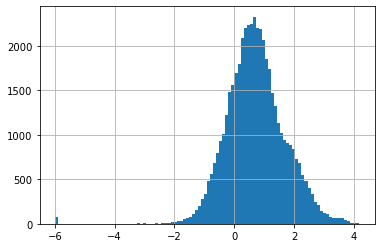

In [66]:
np.log10(s119['diff_mean_cube'] + 1e-6).hist(bins=100)

In [19]:
((s119['waked_frac'] <= 0.1) & (s119['nan_count'] < 500)).mean()

0.5446467018986103

In [20]:
# percent increase of mechanical KE - This says how much "extra" energy should be recoverable in low frequencies within the 10-min window
s119['extra_ke_frac'] = s119['cum_square_sd_30s'] / (s119['mean'] ** 2)
# percent increase of electrical power
s119['extra_power_frac'] = s119['cum_cube_sd_30s'] / (s119['mean'] ** 3)

In [21]:
s119['extra_ke_frac'].describe()

count    44098.000000
mean         0.053886
std          0.074667
min          0.000030
25%          0.010172
50%          0.026514
75%          0.066329
max          1.569477
Name: extra_ke_frac, dtype: float64

In [22]:
s119['extra_power_frac'].describe()

count    44098.000000
mean         0.190500
std          0.274450
min          0.000174
25%          0.038683
50%          0.096332
75%          0.231413
max          8.530752
Name: extra_power_frac, dtype: float64

In [23]:
s119['ti'] = np.sqrt(s119['diff_mean_sq']) / s119['mean']
s119['ti'].describe()

count    47862.000000
mean         0.226206
std          0.170944
min          0.001059
25%          0.116521
50%          0.184461
75%          0.290274
max          4.885784
Name: ti, dtype: float64

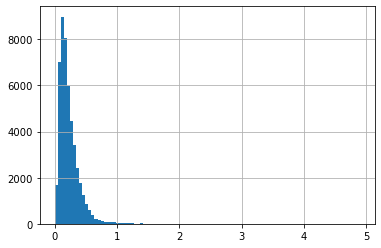

In [110]:
s119['ti'].hist(bins=100)

#### Clearly a multiplicative process:

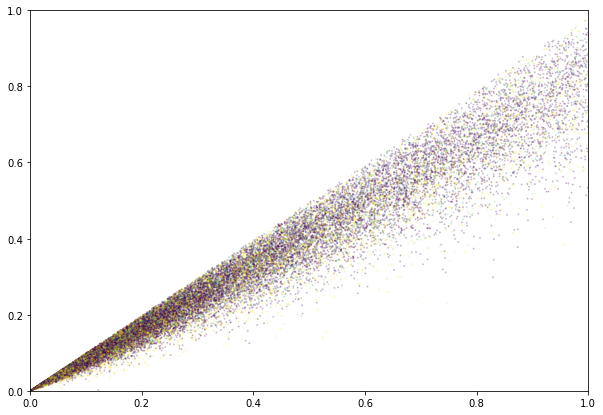

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(s119['diff_mean_sq'], s119['cum_square_sd_30s'], s=1, alpha=0.2, c=s119['waked_frac'])
plt.axis([0,1,0,1])
plt.show()

#### So divide by x var

In [25]:
s119['30s_ke_frac'] = s119['cum_square_sd_30s'] / s119['diff_mean_sq']
s119['30s_ke_frac'].describe()

count    44098.000000
mean         0.807983
std          0.105352
min          0.013634
25%          0.744555
50%          0.820496
75%          0.886588
max          0.994270
Name: 30s_ke_frac, dtype: float64

In [67]:
s119['30s_power_frac'] = s119['cum_cube_sd_30s'] / s119['diff_mean_cube']
s119['30s_power_frac'].describe()

count    44098.000000
mean         0.967374
std          0.026986
min          0.589335
25%          0.955657
50%          0.973464
75%          0.986653
max          0.999866
Name: 30s_power_frac, dtype: float64

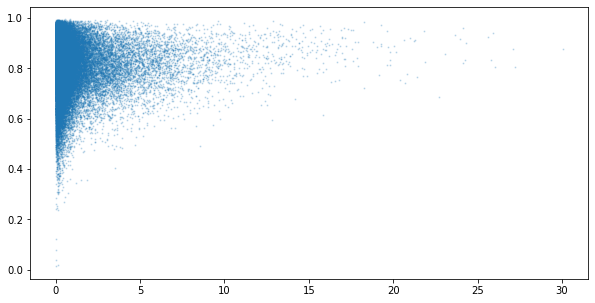

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(s119['diff_mean_sq'], s119['30s_ke_frac'], s=1, alpha=0.2,)
#plt.axis([0,1,0,1])
plt.show()

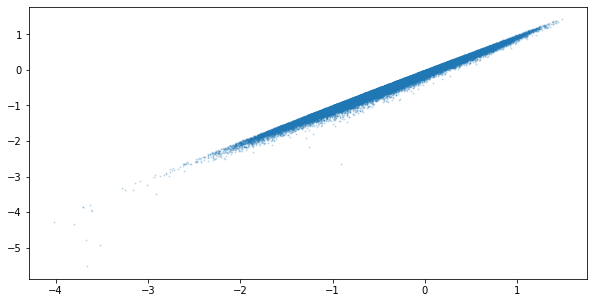

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(np.log10(s119['diff_mean_sq']), np.log10(s119['cum_square_sd_30s']), s=1, alpha=0.2,)
#plt.yscale('log')
#plt.axis([0,1,0,1])
plt.show()

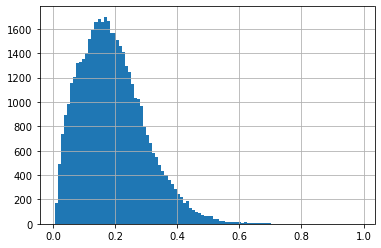

In [73]:
(1 - s119['30s_ke_frac']).hist(bins=100)

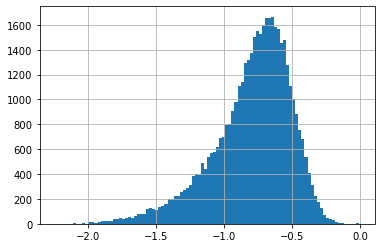

In [72]:
np.log10(1 - s119['30s_ke_frac']).hist(bins=100)

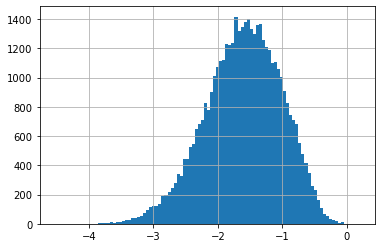

In [76]:
np.log10(s119['extra_ke_frac']).hist(bins=100)

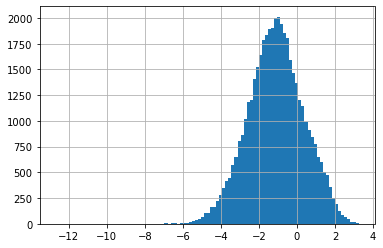

In [30]:
np.log(s119['cum_square_sd_30s']).hist(bins=100)

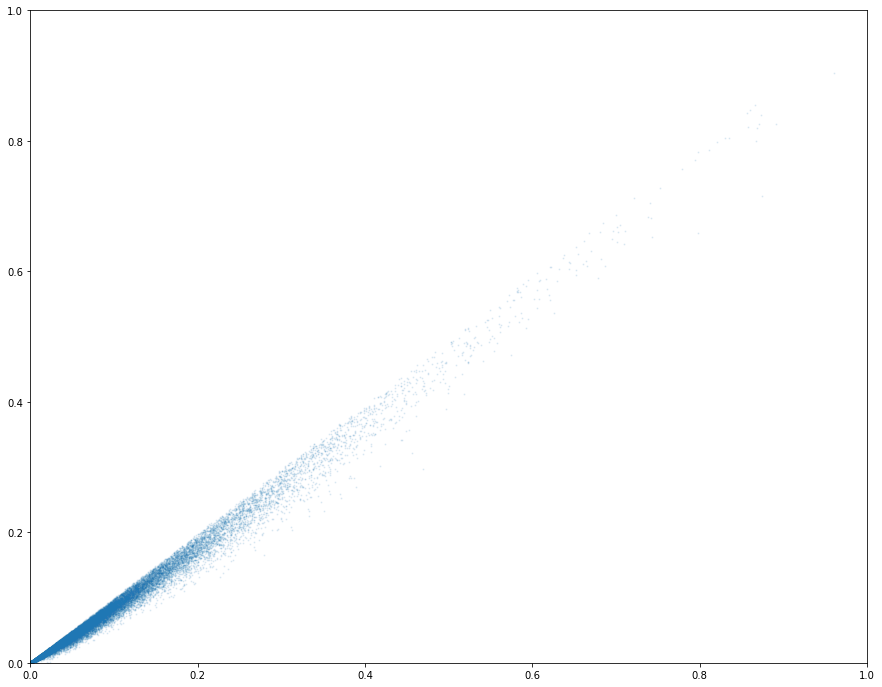

In [31]:
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(s119['ti']**2, s119['extra_ke_frac'], s=1, alpha=0.1,)
plt.axis([0,1,0,1])
plt.show()

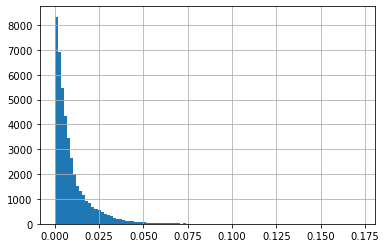

In [32]:
(s119['ti']**2 - s119['extra_ke_frac']).hist(bins=100)

#### On log10 scale, can see that majority of points are less than 1% different from TI^2 prediction

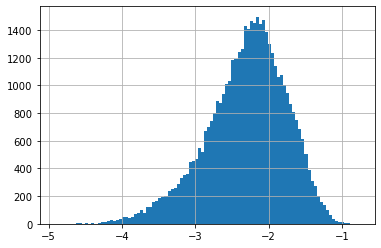

In [33]:
np.log10((s119['ti']**2 - s119['extra_ke_frac'])).hist(bins=100)

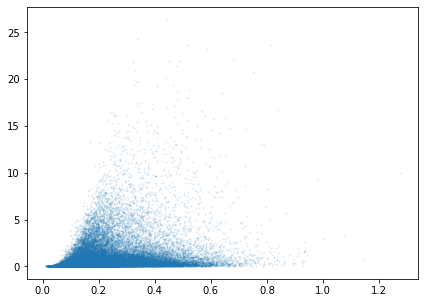

In [34]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(s119['ti'], s119['cum_square_sd_30s'], s=1, alpha=0.1,)
#plt.axis([0,1,0,1])
plt.show()

## Direction/wake make a big difference

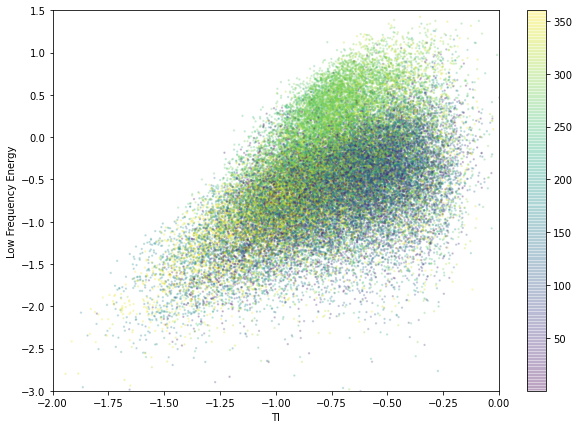

In [35]:
fig, ax = plt.subplots(figsize=(10,7))
plot = ax.scatter(np.log10(s119['ti']), np.log10(s119['cum_square_sd_30s']), s=2, alpha=0.2, c=s119['dir_mean'])
ax.set_xlabel('TI')
ax.set_ylabel('Low Frequency Energy')
plt.axis([-2,0,-3,1.5])
plt.colorbar(plot)
plt.show()

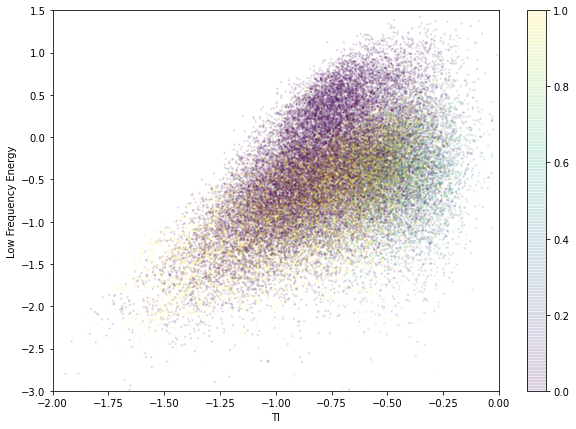

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
plot = ax.scatter(np.log10(s119['ti']), np.log10(s119['cum_square_sd_30s']), s=2, alpha=0.1, c=s119['waked_frac'])
ax.set_xlabel('TI')
ax.set_ylabel('Low Frequency Energy')
plt.axis([-2,0,-3,1.5])
plt.colorbar(plot)
plt.show()

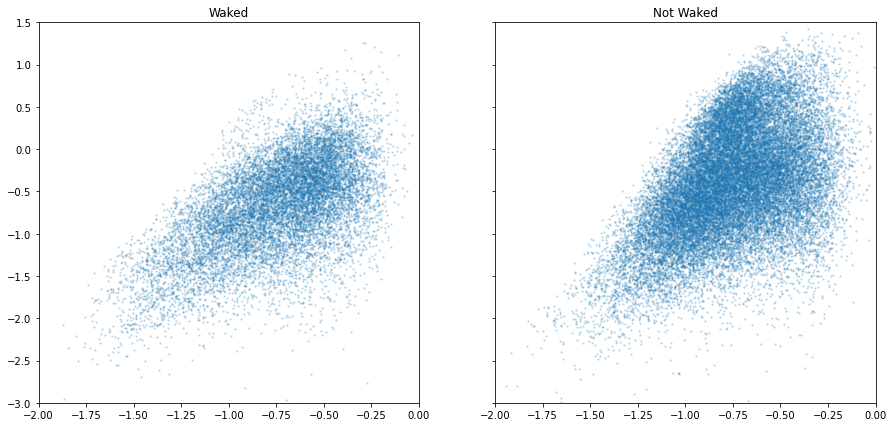

In [37]:
filter_ = s119['waked_frac'] > 0.5
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,7))
ax[0].scatter(np.log10(s119.loc[filter_, 'ti']), np.log10(s119.loc[filter_, 'cum_square_sd_30s']), s=2, alpha=0.2)
ax[1].scatter(np.log10(s119.loc[~filter_, 'ti']), np.log10(s119.loc[~filter_, 'cum_square_sd_30s']), s=2, alpha=0.2)
ax[0].set_title('Waked')
ax[1].set_title('Not Waked')
plt.axis([-2,0,-3,1.5])
plt.show()

In [38]:
for col in ['ti', 'cum_square_sd_30s']:
    s119[col+'_log'] = np.log10(s119[col])

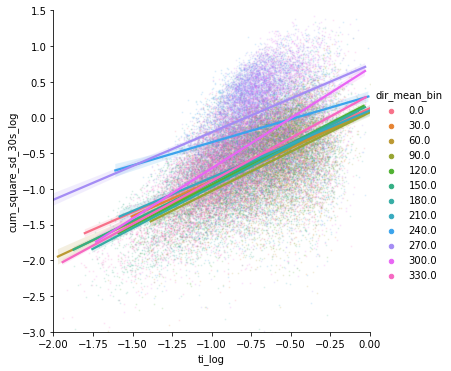

In [39]:
sectors = 12
sector_size = 360 / sectors
s119['dir_mean_bin'] = s119['dir_mean'] // sector_size * sector_size
g = sns.lmplot(data=s119, x='ti_log', y='cum_square_sd_30s_log', hue='dir_mean_bin', scatter_kws={"s": 1, 'alpha':0.1})
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([20])
plt.axis([-2,0,-3,1.5])
plt.show()

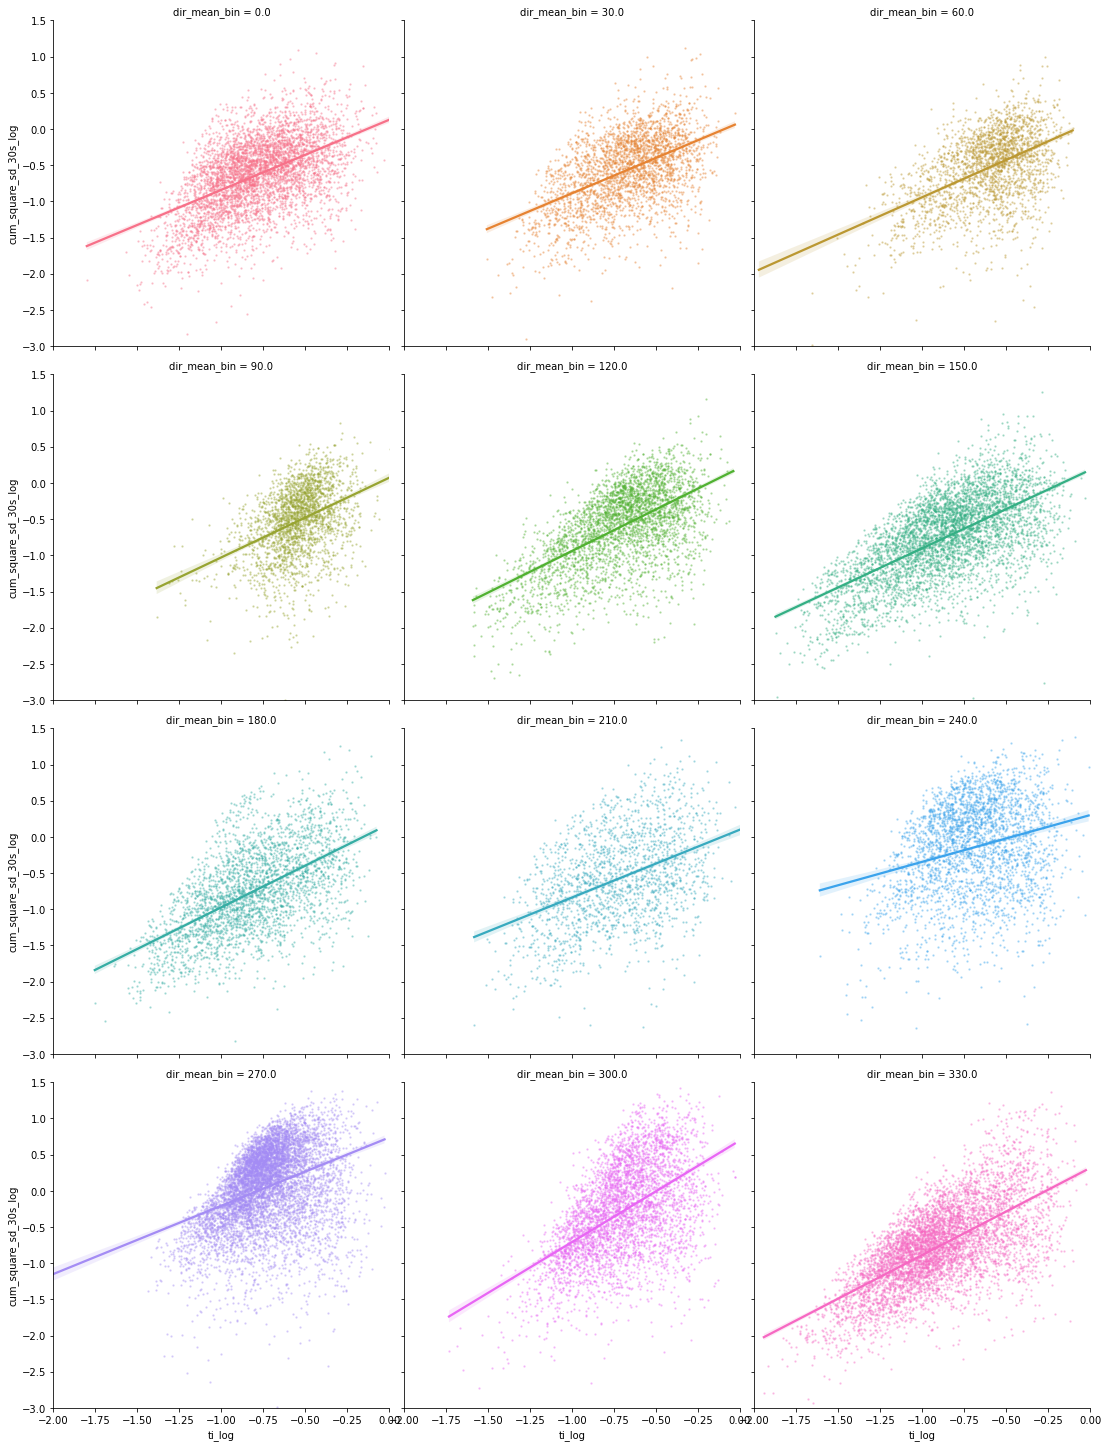

In [40]:
sns.lmplot(data=s119, x='ti_log', y='cum_square_sd_30s_log', col='dir_mean_bin', hue='dir_mean_bin', scatter_kws={"s": 2, 'alpha':0.3}, col_wrap=3)
plt.axis([-2,0,-3,1.5])
plt.show()

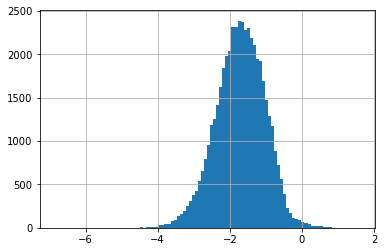

In [41]:
np.log(s119['ti']).hist(bins=100)

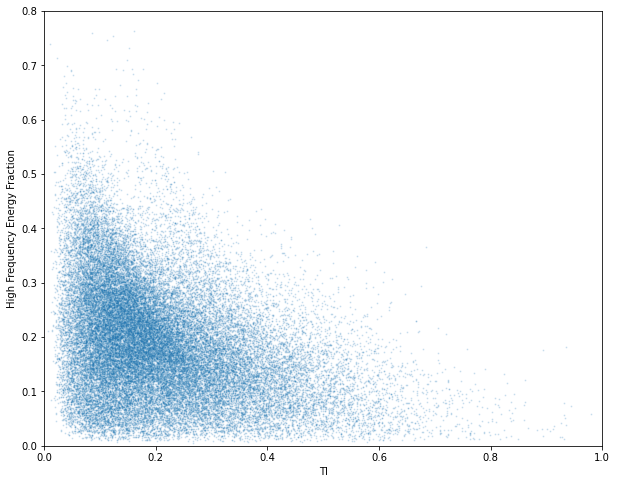

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(s119['ti'], 1 - s119['30s_ke_frac'], s=1, alpha=0.15,)
ax.set_xlabel('TI')
ax.set_ylabel('High Frequency Energy Fraction')
plt.axis([0,1,0,0.8])
plt.show()

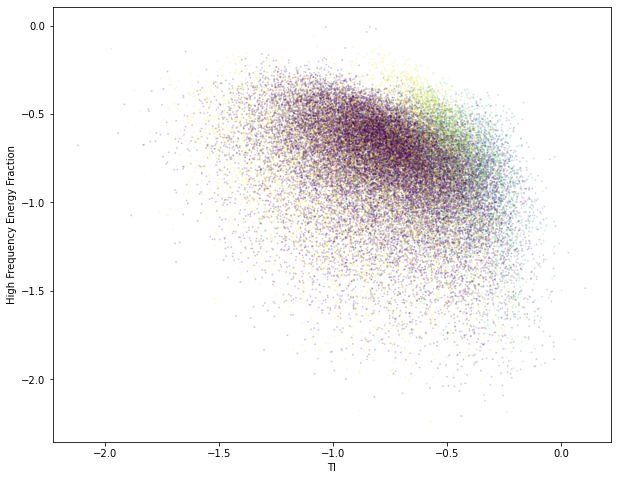

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(np.log10(s119['ti']), np.log10(1 - s119['30s_ke_frac']), s=1, alpha=0.15, c=s119['waked_frac'])
ax.set_xlabel('TI')
ax.set_ylabel('High Frequency Energy Fraction')
#plt.axis([0,1,0,1])
plt.show()

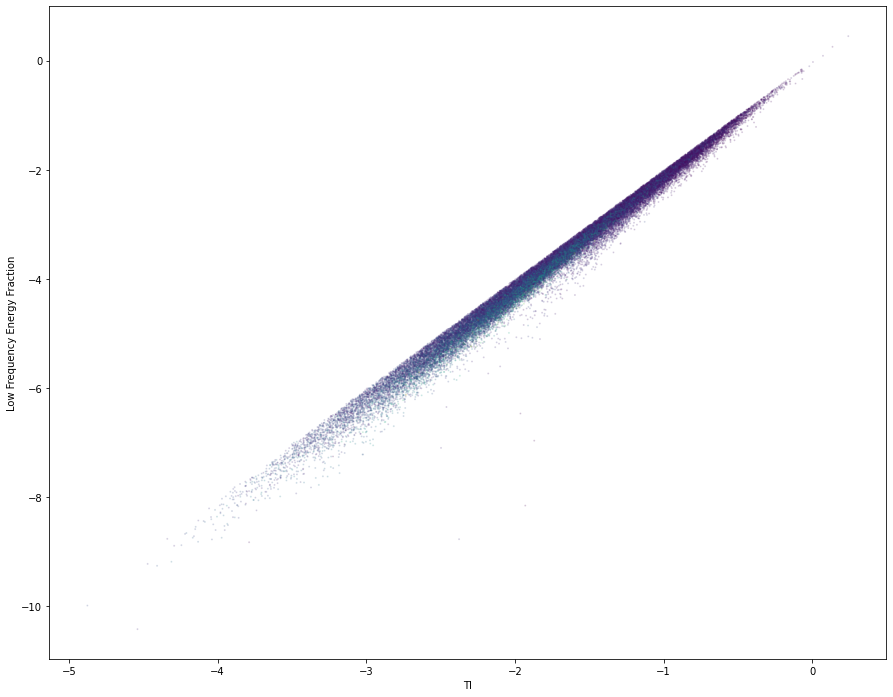

In [44]:
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(np.log(s119['ti']), np.log(s119['extra_ke_frac']), s=1, alpha=0.15, c=s119['mean'])
ax.set_xlabel('TI')
ax.set_ylabel('Low Frequency Energy Fraction')
#plt.axis([0,1,0,1])
plt.show()

### Check timestamps are in local time: TI looks correct

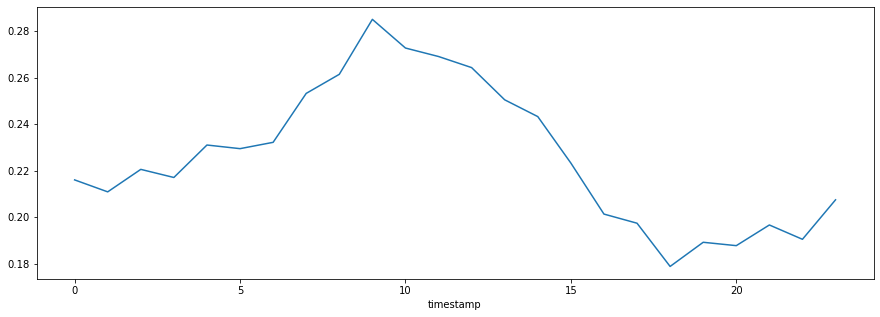

In [45]:
plt.figure(figsize=(15,5))
(s119.groupby(s119.index.hour)['ti'].mean()).plot()
plt.show()

## Change Perspective: temporal distribution of un-recoverable KE
We already know a portion of energy is sub-10-minute frequency; we call that TI (squared) and it is usually 1%-2.5%.

What TI does NOT account for is the importance of frequency. So instead of looking at 'recoverable' energy, which is largely captured by TI, I should look directly at the missing part - unrecoverable energy.

In [81]:
cutoffs = [60, 30, 10, 2]

In [84]:
for cutoff in cutoffs:
    s119[f'unrec_{cutoff}s'] = s119['diff_mean_sq'] - s119[f'cum_square_sd_{cutoff}s']

### Annual energy difference

In [89]:
cc = s119[['mean', 'diff_mean_sq', 'diff_mean_cube',
           'unrec_60s', 'unrec_30s', 'unrec_10s', 'unrec_2s']
         ].dropna()
cc.count()

mean              44098
diff_mean_sq      44098
diff_mean_cube    44098
unrec_60s         44098
unrec_30s         44098
unrec_10s         44098
unrec_2s          44098
dtype: int64

In [90]:
cc['total_energy'] = cc['mean']**2 + cc['diff_mean_sq']

#### Bias depends on cutoff freq, and some are above 0.5% (my informal threshold for relevance)

In [91]:
cc[['unrec_60s', 'unrec_30s', 'unrec_10s', 'unrec_2s']].sum() / cc['total_energy'].sum()

unrec_60s    0.009560
unrec_30s    0.006136
unrec_10s    0.003020
unrec_2s     0.000975
dtype: float64

### Another consideration: is there is a strong seasonality? (correlation with price)

## Seasonal/Diurnal pattern
Definitely a mid-day peak, but hard to tell the seasonal pattern due to high variance and missing data in winter.

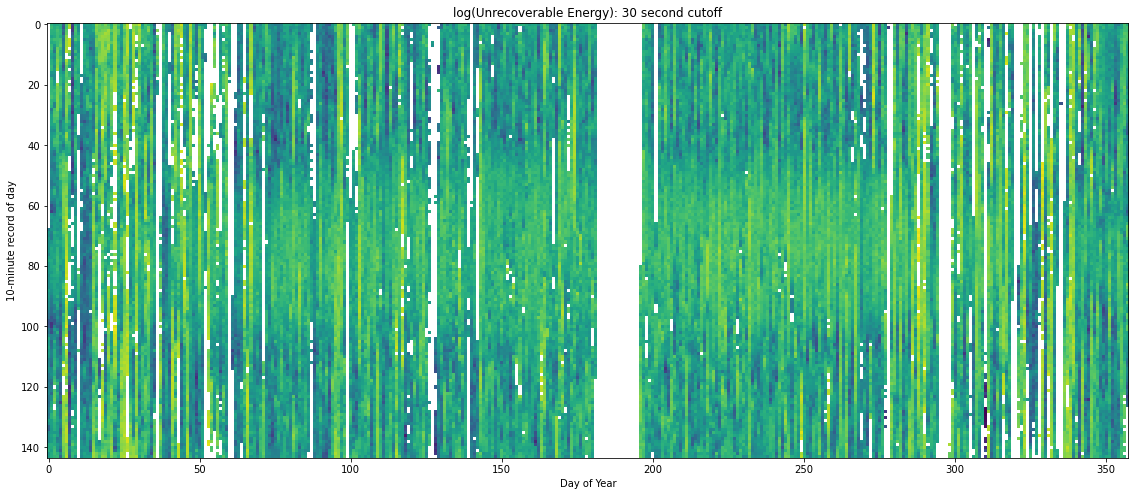

In [145]:
plt.figure(figsize=(20,8))
plt.imshow(s119.groupby([(s119.index.hour * 60 + s119.index.minute)/60, (s119.index.dayofyear)])['unrec_30s'].mean().transform(np.log10).unstack())
plt.xlabel('Day of Year')
plt.ylabel('10-minute record of day')
plt.title('log(Unrecoverable Energy): 30 second cutoff')
plt.show()

In [102]:
# Fraction missing
s119['unrec_30s'].isna().mean()

0.13685652769622236

#### Diurnal pattern looks driven by radiative heating - makes sense for high freq turbulence

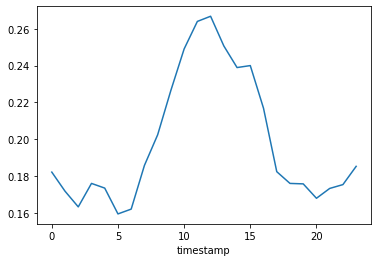

In [103]:
s119.groupby(s119.index.hour)['unrec_30s'].mean().plot()

#### Seasonal pattern is counter to radiative expectation - due to higher winter wind speeds? Normalize to check

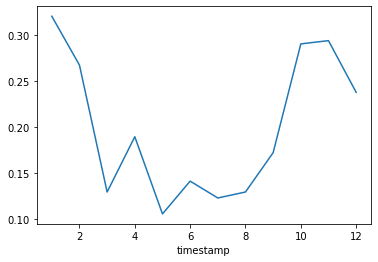

In [114]:
s119.groupby(s119.index.month)['unrec_30s'].mean().plot()

### What fraction of total energy is unrecoverable (past the cutoff frequency)?
Normalize by total energy

In [116]:
s119['total_energy'] = s119['mean']**2 + s119['diff_mean_sq']

**Diurnal pattern is unchanged by normalization**

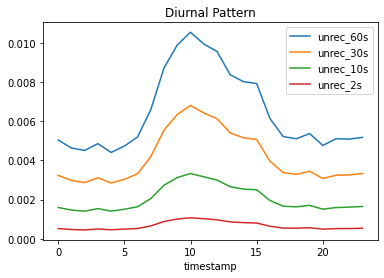

In [144]:
(s119.groupby(s119.index.hour)[['unrec_60s', 'unrec_30s', 'unrec_10s', 'unrec_2s']].sum().div(s119.groupby(s119.index.hour)['total_energy'].sum(), axis=0)
).plot(title='Diurnal Pattern')

**As expected, normalization totally changes seasonal pattern (none to speak of). Still surprised not to see a summer peak.** I guess I don't know much about Boulder, CO weather

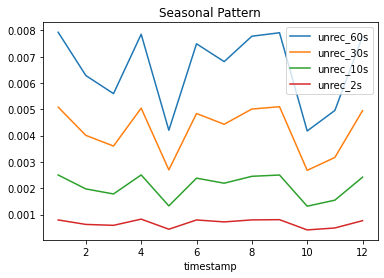

In [143]:
(s119.groupby(s119.index.month)[['unrec_60s', 'unrec_30s', 'unrec_10s', 'unrec_2s']].sum().div(s119.groupby(s119.index.month)['total_energy'].sum(), axis=0)
).plot(title='Seasonal Pattern')

In [146]:
s119['unrec_30s_ke_frac'] = s119['unrec_30s'] / s119['total_energy']

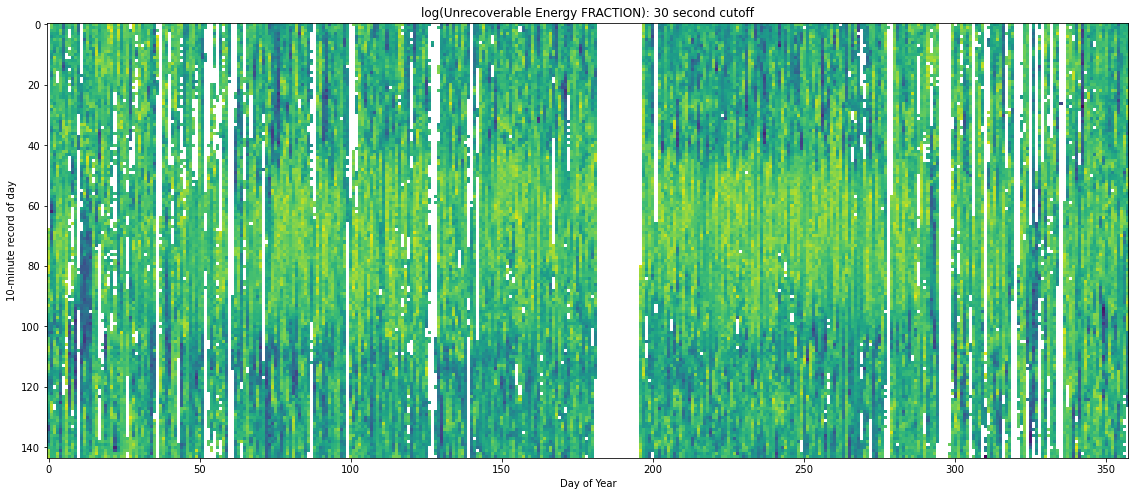

In [149]:
plt.figure(figsize=(20,8))
plt.imshow(s119.groupby([(s119.index.hour * 60 + s119.index.minute)/60, (s119.index.dayofyear)])['unrec_30s_ke_frac'].mean().transform(np.log10).unstack())
plt.xlabel('Day of Year')
plt.ylabel('10-minute record of day')
plt.title('log(Unrecoverable Energy FRACTION): 30 second cutoff')
plt.show()

**Without log transform**

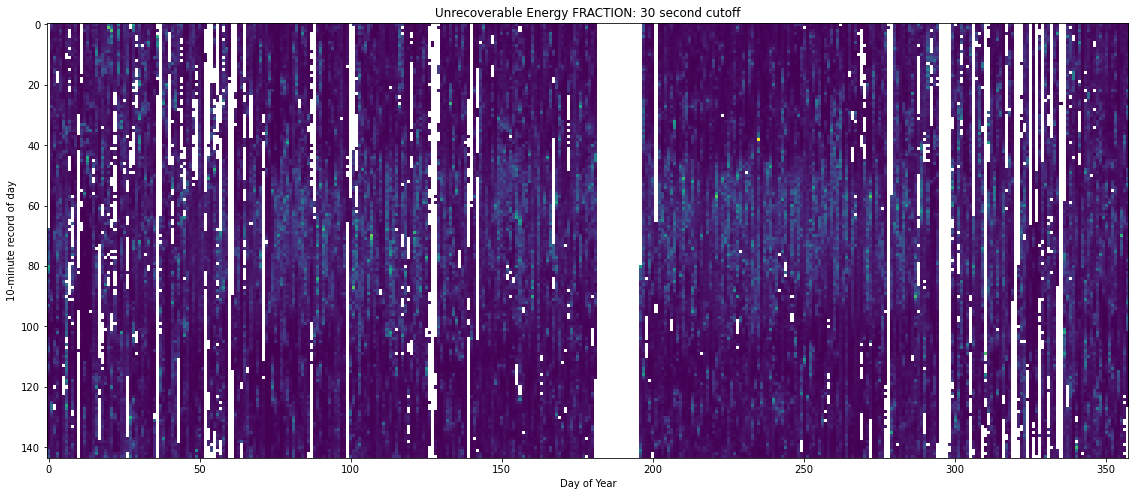

In [150]:
plt.figure(figsize=(20,8))
plt.imshow(s119.groupby([(s119.index.hour * 60 + s119.index.minute)/60, (s119.index.dayofyear)])['unrec_30s_ke_frac'].mean().unstack())
plt.xlabel('Day of Year')
plt.ylabel('10-minute record of day')
plt.title('Unrecoverable Energy FRACTION: 30 second cutoff')
plt.show()

## Filter waked/missing data

In [58]:
s119_filtered = s119.query('(vert_nan_count < 1000) & (waked_frac < 0.1)')

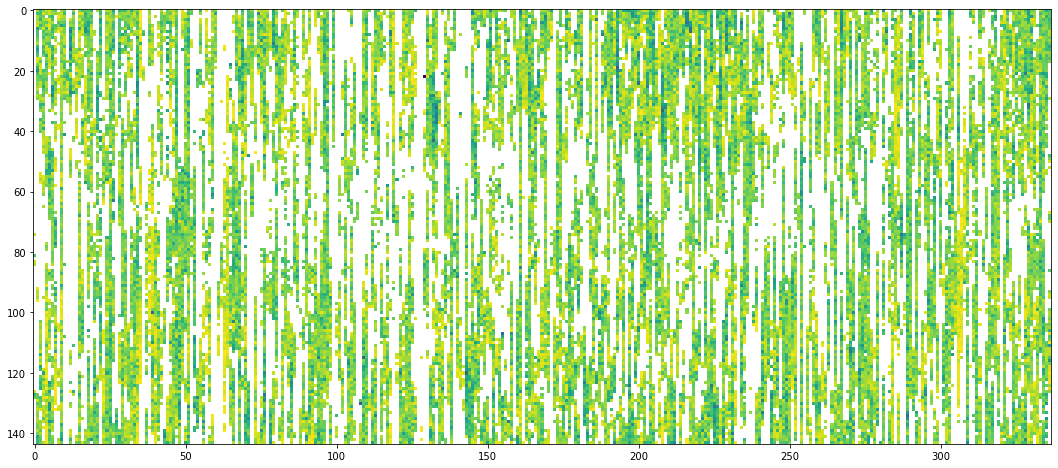

In [59]:
plt.figure(figsize=(20,8))
plt.imshow(s119_filtered.groupby([(s119_filtered.index.hour * 60 + s119_filtered.index.minute)/60, (s119_filtered.index.dayofyear)])['30s_ke_frac'].mean().unstack())
plt.show()

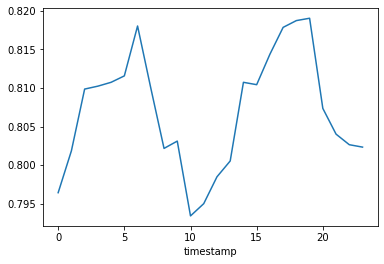

In [60]:
s119_filtered.groupby(s119_filtered.index.hour)['30s_ke_frac'].mean().plot()

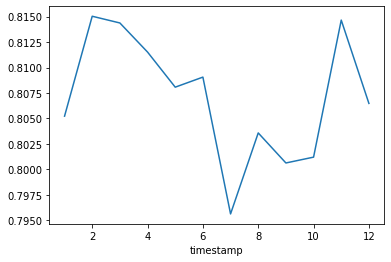

In [61]:
s119_filtered.groupby(s119_filtered.index.month)['30s_ke_frac'].mean().plot()

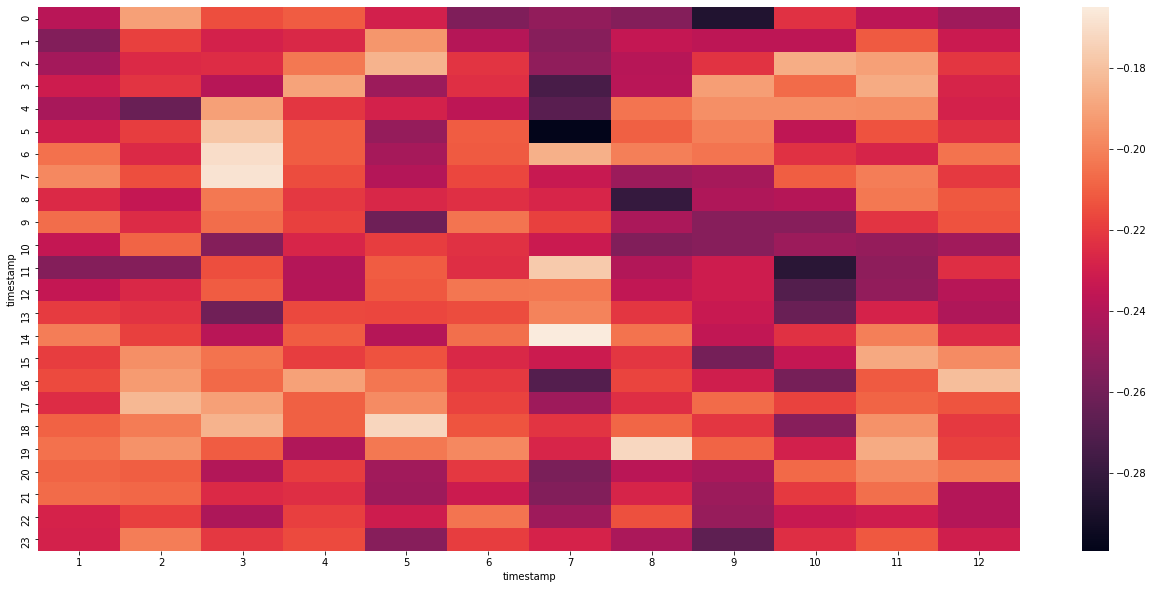

In [62]:
plt.figure(figsize=(22,10))
sns.heatmap(s119_filtered.groupby([s119_filtered.index.hour, (s119_filtered.index.month)])['30s_ke_frac_log'].mean().unstack())
plt.show()

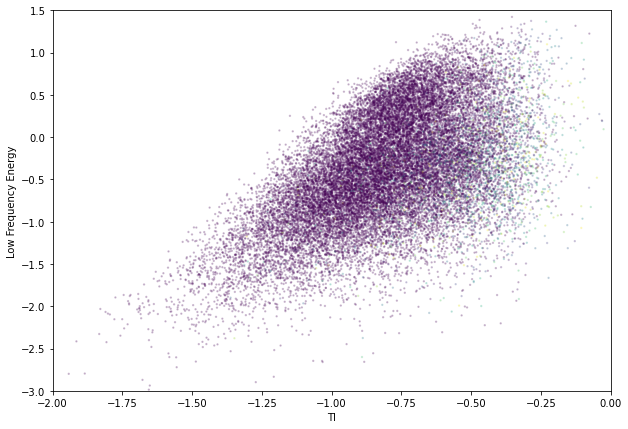

In [63]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(np.log10(s119_filtered['ti']), np.log10(s119_filtered['cum_square_sd_30s']), s=2, alpha=0.2, c=s119_filtered['waked_frac'])
ax.set_xlabel('TI')
ax.set_ylabel('Low Frequency Energy')
plt.axis([-2,0,-3,1.5])
plt.show()

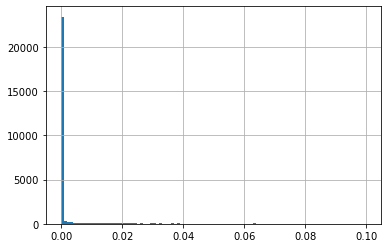

In [64]:
s119_filtered['waked_frac'].hist(bins=100)